In [1]:
# Lets compare worlds data faker and how hard he carried vs. Other mids
# Lastly we will look at faker vs. ADC 
# This will only be for group stage we will
import pandas as pd
import numpy as np

player_data = pd.read_csv('./Data/Player_specific_data.csv')
player_data.head()

,gameid,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,...,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10
0,1002390182,Top,Letme,Royal Never Give Up,Cho'gath,Gragas,Xayah,Alistar,Taliyah,Lucian,...,8.748387,3114,3225,-111,4986,4903,83,4493,4817,-324
1,1002390182,Jungle,Mlxg,Royal Never Give Up,Rek'Sai,Gragas,Xayah,Alistar,Taliyah,Lucian,...,4.748387,2944,3560,-616,5052,5266,-214,3378,3686,-308
2,1002390182,Middle,Xiaohu,Royal Never Give Up,Ryze,Gragas,Xayah,Alistar,Taliyah,Lucian,...,9.341935,3113,3623,-510,5275,5322,-47,4478,5053,-575
3,1002390182,ADC,Uzi,Royal Never Give Up,Kog'Maw,Gragas,Xayah,Alistar,Taliyah,Lucian,...,10.348387,3035,3205,-170,4884,5105,-221,3192,3336,-144
4,1002390182,Support,Ming,Royal Never Give Up,Janna,Gragas,Xayah,Alistar,Taliyah,Lucian,...,0.258065,2279,2307,-28,3528,3403,125,2742,2795,-53


In [2]:
# Need to drop tiebraker games
player_data = player_data[(player_data.gameid != 1002390592) & (player_data.gameid != 1002390599) & (player_data.gameid != 1002380443)]
player_data



,gameid,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,...,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10
0,1002390182,Top,Letme,Royal Never Give Up,Cho'gath,Gragas,Xayah,Alistar,Taliyah,Lucian,...,8.748387,3114,3225,-111,4986,4903,83,4493,4817,-324
1,1002390182,Jungle,Mlxg,Royal Never Give Up,Rek'Sai,Gragas,Xayah,Alistar,Taliyah,Lucian,...,4.748387,2944,3560,-616,5052,5266,-214,3378,3686,-308
2,1002390182,Middle,Xiaohu,Royal Never Give Up,Ryze,Gragas,Xayah,Alistar,Taliyah,Lucian,...,9.341935,3113,3623,-510,5275,5322,-47,4478,5053,-575
3,1002390182,ADC,Uzi,Royal Never Give Up,Kog'Maw,Gragas,Xayah,Alistar,Taliyah,Lucian,...,10.348387,3035,3205,-170,4884,5105,-221,3192,3336,-144
4,1002390182,Support,Ming,Royal Never Give Up,Janna,Gragas,Xayah,Alistar,Taliyah,Lucian,...,0.258065,2279,2307,-28,3528,3403,125,2742,2795,-53
5,1002390182,Top,Thaldrin,Fenerbahce Esports,Maokai,Kalista,Jarvan IV,Sejuani,Shen,Galio,...,8.051613,3225,3114,111,4903,4986,-83,4817,4493,324
6,1002390182,Jungle,Crash,Fenerbahce Esports,Nidalee,Kalista,Jarvan IV,Sejuani,Shen,Galio,...,5.651613,3560,2944,616,5266,5052,214,3686,3378,308
7,1002390182,Middle,Frozen,Fenerbahce Esports,Syndra,Kalista,Jarvan IV,Sejuani,Shen,Galio,...,10.322581,3623,3113,510,5322,5275,47,5053,4478,575
8,1002390182,ADC,Padden,Fenerbahce Esports,Tristana,Kalista,Jarvan IV,Sejuani,Shen,Galio,...,10.658065,3205,3035,170,5105,4884,221,3336,3192,144
9,1002390182,Support,Japone,Fenerbahce Esports,Lulu,Kalista,Jarvan IV,Sejuani,Shen,Galio,...,1.264516,2307,2279,28,3403,3528,-125,2795,2742,53


In [3]:
# Now that we have the player values so lets find the mean, mode, 
# min, max for each player 
# Lets find values that are important for players performance

# Those values are: k,d,a,fb,fbassit,fbvictim,ckpm, dmgshare, earnedgoldshare
# earnedgpm, csdat10, gdat10, gdat15
# Lets create a new df with those values specifically
carry_values = ['gameid','position','team','player','k','d','a','fb','fbassist','fbvictim','ckpm','dmgshare','earnedgoldshare','earnedgpm','gdat10','gdat15']
carry_df = player_data[carry_values]
carry_df.head()

,gameid,position,team,player,k,d,a,fb,fbassist,fbvictim,ckpm,dmgshare,earnedgoldshare,earnedgpm,gdat10,gdat15
0,1002390182,Top,Royal Never Give Up,Letme,3,0,6,0,0,0,0.412903,0.239564,0.201312,270.885161,-111,83
1,1002390182,Jungle,Royal Never Give Up,Mlxg,4,2,5,0,0,1,0.412903,0.194365,0.175536,236.201290,-616,-214
2,1002390182,Middle,Royal Never Give Up,Xiaohu,3,0,8,0,0,0,0.412903,0.227460,0.221967,298.678710,-510,-47
3,1002390182,ADC,Royal Never Give Up,Uzi,3,1,4,0,0,0,0.412903,0.303497,0.241069,324.381935,-170,-221
4,1002390182,Support,Royal Never Give Up,Ming,0,0,11,0,0,0,0.412903,0.035114,0.160117,215.452903,-28,125


In [4]:
# Lets describe those values now
carry_df.describe()

,gameid,k,d,a,fb,fbassist,fbvictim,ckpm,dmgshare,earnedgoldshare,earnedgpm,gdat10,gdat15
count,4.800000e+02,480.000000,480.00000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,1.002385e+09,1.854167,1.85625,4.964583,0.100000,0.193750,0.100000,0.529054,0.200000,0.200000,234.639668,0.000000,0.000000
std,4.989165e+03,2.045307,1.50648,3.860944,0.300313,0.395648,0.300313,0.200844,0.120639,0.045030,65.280054,415.624675,733.906188
min,1.002380e+09,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.239617,0.009673,0.088606,64.471439,-1823.000000,-2639.000000
25%,1.002380e+09,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.373864,0.094263,0.161667,189.241212,-238.000000,-421.250000
50%,1.002380e+09,1.000000,2.00000,4.000000,0.000000,0.000000,0.000000,0.508150,0.194243,0.195867,225.541501,0.000000,0.000000
75%,1.002390e+09,3.000000,3.00000,7.000000,0.000000,0.000000,0.000000,0.655535,0.286197,0.235218,280.946847,238.000000,421.250000
max,1.002391e+09,11.000000,8.00000,22.000000,1.000000,1.000000,1.000000,1.363636,0.525138,0.308938,434.699174,1823.000000,2639.000000


In [5]:
# Above we see all players stats but lets create a df of just mid laners 
mid_laners = carry_df[carry_df.position == 'Middle']
mid_laners.describe()

,gameid,k,d,a,fb,fbassist,fbvictim,ckpm,dmgshare,earnedgoldshare,earnedgpm,gdat10,gdat15
count,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.002385e+09,2.354167,1.718750,4.552083,0.177083,0.145833,0.104167,0.529054,0.271260,0.228928,267.163125,0.000000,0.000000
std,5.010128e+03,1.823699,1.381861,3.250489,0.383743,0.354792,0.307080,0.201688,0.063136,0.020625,43.210639,382.787697,640.383668
min,1.002380e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.239617,0.088233,0.171210,153.574983,-997.000000,-2010.000000
25%,1.002380e+09,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.373864,0.231336,0.217815,235.124620,-241.500000,-368.500000
50%,1.002380e+09,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.508150,0.271594,0.231011,263.481318,0.000000,0.000000
75%,1.002390e+09,3.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.655535,0.307674,0.241799,302.634692,241.500000,368.500000
max,1.002391e+09,9.000000,5.000000,13.000000,1.000000,1.000000,1.000000,1.363636,0.416569,0.265660,347.352166,997.000000,2010.000000


In [6]:
# Here we get some good values for all mid laners so lets store those and 
# Then check how everyone did comapred to the group as a whole
# Lets save  this data to be referenced later
mid_described = mid_laners.describe()

# Exporting the data for later use


In [7]:
# Grouping the games together by player and finding their stats
average_of_mids = mid_laners.groupby(by='player').describe()
average_of_mids.head()
#average_of_mids.to_csv('./Data/Total_mid_laner_stats.csv',encoding = 'utf-8')

a                                                   ckpm  \
         count      mean       std  min   25%  50%    75%   max count   
player                                                                  
Bdd        6.0  7.333333  3.011091  4.0  5.25  6.5  10.00  11.0   6.0   
Bjergsen   6.0  4.333333  2.943920  2.0  2.50  4.0   4.00  10.0   6.0   
Caps       6.0  3.666667  2.658320  0.0  3.00  3.0   4.50   8.0   6.0   
Chawy      2.0  1.500000  0.707107  1.0  1.25  1.5   1.75   2.0   2.0   
Crown      6.0  3.500000  3.449638  0.0  2.00  2.5   3.75  10.0   6.0   

                   ...   gdat15             k                                 \
              mean ...      75%     max count      mean       std  min   25%   
player             ...                                                         
Bdd       0.633254 ...   144.50  1207.0   6.0  3.666667  3.076795  0.0  2.25   
Bjergsen  0.559047 ...    13.75   247.0   6.0  2.333333  2.250926  0.0  1.00   
Caps      0.633754 ...   312.50   540.0   6.0  1.833333  1.940790  0.0  0.25   
Chawy     0.423214 ...   -53.00   417.0   2.0  1.000000  1.414214  0.0  0.50   
Crown     0.450246 ...   -88.50    16.0   6.0  2.000000  1.673320  0.0  1.25   

                          
          50%   75%  max  
player                    
Bdd       3.0  4.50  9.0  
Bjergsen  1.5  3.50  6.0  
Caps      1.5  2.75  5.0  
Chawy     1.0  1.50  2.0  
Crown     2.0  2.00  5.0  

[5 rows x 104 columns]

In [8]:
# Lets see what our data looks like
average_of_mids.shape

# Here the data is (17,104), lets pull out the performances 
# for each category for each player
final_mid_averages = average_of_mids.iloc[:,average_of_mids.columns.get_level_values(1) == 'mean']
final_mid_75 = average_of_mids.iloc[:,average_of_mids.columns.get_level_values(1) == '75%']
final_mid_max = average_of_mids.iloc[:,average_of_mids.columns.get_level_values(1) == 'max']
final_mid_25 = average_of_mids.iloc[:,average_of_mids.columns.get_level_values(1) == '25%']
final_mid_min = average_of_mids.iloc[:,average_of_mids.columns.get_level_values(1) == 'min']

In [9]:
# Now that we have all the players values lets do some analysis
# Lets compare Bjergsen and Fakers averages 

#First have to drop the top level for ease of access later
final_mid_averages.columns = final_mid_averages.columns.droplevel(1)
final_mid_75.columns = final_mid_75.columns.droplevel(1)
final_mid_max.columns = final_mid_max.columns.droplevel(1)
final_mid_25.columns = final_mid_25.columns.droplevel(1)
final_mid_min.columns = final_mid_min.columns.droplevel(1)


In [10]:
final_mid_averages.loc[['Scout','Jensen','Caps','Faker','Crown']]

,a,ckpm,d,dmgshare,earnedgoldshare,earnedgpm,fb,fbassist,fbvictim,gameid,gdat10,gdat15,k
player,,,,,,,,,,,,,
Scout,6.000000,0.546821,2.166667,0.282240,0.229592,280.166218,0.333333,0.166667,0.166667,1.002384e+09,410.166667,857.666667,3.333333
Jensen,3.500000,0.542607,2.000000,0.246827,0.238049,282.110647,0.166667,0.166667,0.000000,1.002384e+09,222.000000,81.666667,3.500000
Caps,3.666667,0.633754,2.000000,0.293961,0.231414,256.228906,0.166667,0.666667,0.000000,1.002384e+09,207.166667,86.333333,1.833333
Faker,6.000000,0.491067,2.166667,0.279180,0.223241,280.802022,0.166667,0.000000,0.333333,1.002385e+09,-304.000000,-258.166667,2.666667
Crown,3.500000,0.450246,1.500000,0.253147,0.214567,260.824230,0.166667,0.000000,0.000000,1.002385e+09,53.166667,-240.666667,2.000000


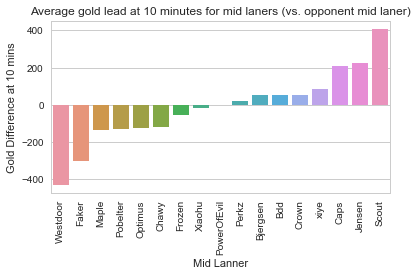

In [11]:
#Lets do some graphing and see what the data looks like
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

temp_sort = final_mid_averages.sort_values(by='gdat10')
x = temp_sort.index
y = temp_sort['gdat10'].values


sns.set(style='whitegrid')
sns.barplot(x,y)
plt.xlabel('Mid Lanner')
plt.ylabel('Gold Difference at 10 mins')
plt.title('Average gold lead at 10 minutes for mid laners (vs. opponent mid laner)')
plt.xticks(rotation = 90)
plt.tight_layout()


#plt.savefig('./Final_Images/Avg_Mid_leaders_at_10.png', dpi = 400)



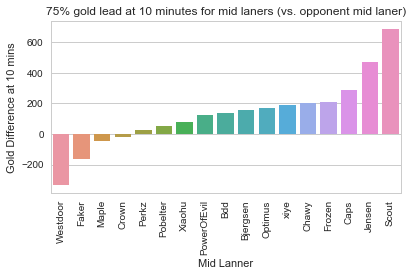

In [12]:
# Now lets see how they do at their best 
temp_sort = final_mid_75.sort_values(by='gdat10')
x = temp_sort.index
y = temp_sort['gdat10'].values

sns.set(style='whitegrid')
sns.barplot(x,y)
plt.xlabel('Mid Lanner')
plt.ylabel('Gold Difference at 10 mins')
plt.title('75% gold lead at 10 minutes for mid laners (vs. opponent mid laner)')
plt.xticks(rotation = 90)
plt.tight_layout()

#plt.savefig('./Final_Images/75_Mid_leaders_at_10.png', dpi = 400)



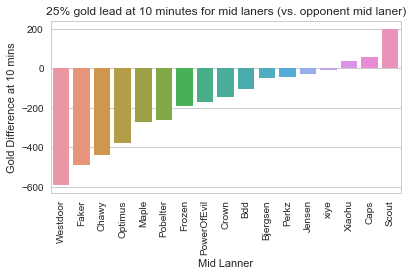

In [13]:
# Now at their worst
temp_sort = final_mid_25.sort_values(by='gdat10')
x = temp_sort.index
y = temp_sort['gdat10'].values

sns.set(style='whitegrid')
sns.barplot(x,y)
plt.xlabel('Mid Lanner')
plt.ylabel('Gold Difference at 10 mins')
plt.title('25% gold lead at 10 minutes for mid laners (vs. opponent mid laner)')
plt.xticks(rotation = 90)
plt.tight_layout()

#plt.savefig('./Final_Images/25_Mid_leaders_at_10.png', dpi = 400)


In [14]:
# What we see from the data is Scout is a god
# Caps as well has consistently high performance against his opp mids
# Jensen when ahead is ahead for sure 
# Lets look at how their gold diff changes 5 minutes later
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected = True)

temp_sort = final_mid_averages.sort_values(by = 'gdat15')
gdat10 = list(temp_sort['gdat10'].values)
gdat15 = list(temp_sort['gdat15'].values)
players = list(temp_sort.index)

trace1 = go.Bar(x = players, y = gdat10, name = 'Gold Diff at 10')
trace2 = go.Bar(x = players, y = gdat15, name = 'Gold Diff at 15')

data = [trace1,trace2]
layout = go.Layout(barmode = 'grouped',
                   title = 'Average Mid Gold Difference at 10 and 15 minutes (vs. opposing mid)',
                   yaxis = dict(title = 'Gold Difference'),
                   xaxis = dict(tickangle = 90)
                  )                   
fig = go.Figure(data = data, layout = layout)

#offline.plot(fig, filename = './Final_Images/Mid_performance_at_worlds.html')


'file:///Users/NicholasRoller/Documents/Worlds Analysis/Final_Images/Mid_performance_at_worlds.html'